In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(style='darkgrid')
matplotlib.rcParams['figure.figsize'] = (20, 10)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# Dropping non-essential columns
df.drop(['area_type', 'availability', 'society', 'balcony'], axis = "columns", inplace = True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# Filling NA values
df['bath'] = df['bath'].fillna(math.floor(df['bath'].mean()))
df.isna().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [8]:
# Dropping NA
df = df.dropna()
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(" ")[0]))
df = df.drop(['size'], axis = 'columns')
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [10]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
# Applying is_float function on df.total_sqft and printing the values where the function returns false
df[~df.total_sqft.apply(is_float)].head()

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2


In [13]:
def convert_string_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
df.total_sqft = df.total_sqft.apply(convert_string_to_num)
df[~df.total_sqft.apply(is_float)]

,location,total_sqft,bath,price,bhk


In [15]:
# Dropping the NA values added after applying the function convert_string_to_num
df = df.dropna()
df.isna().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

# *Feature Engineering*

In [16]:
# Making a copy of our data set and adding an extra feature of 
df1 = df.copy()
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']
df1.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [17]:
len(df1.location.unique())

1297

In [18]:
df1.location = df1.location.apply(lambda x: x.strip())
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [19]:
other_location = location_stats[location_stats <= 10]

In [20]:
df1.location = df1.location.apply(lambda x: 'other' if x in other_location else x)

In [21]:
df1.groupby('location')['location'].agg('count').sort_values(ascending = False)

location
other               2873
Whitefield           538
Sarjapur  Road       397
Electronic City      304
Kanakpura Road       271
                    ... 
Banjara Layout        11
Kodigehalli           11
Nehru Nagar           11
Narayanapura          11
LB Shastri Nagar      11
Name: location, Length: 241, dtype: int64

# *Outlier Detection and Removal*

In [22]:
# Using the information that a standard bedroom is that it should measure at least 120 sqft
df1[df1.total_sqft/df.bhk < 120]

,location,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268
349,other,11.0,3.0,74.0,3,672727.272727
397,other,700.0,3.0,120.0,6,17142.857143
482,Kenchenahalli,500.0,3.0,65.0,5,13000.000000
...,...,...,...,...,...,...
12011,9th Phase JP Nagar,800.0,8.0,140.0,8,17500.000000
12067,other,772.0,5.0,60.0,8,7772.020725
12464,other,350.0,3.0,45.0,4,12857.142857
12942,other,625.0,3.0,78.0,6,12480.000000


In [23]:
# Creating a new dataset / dataframe without outliers wrt total_sqft and bhk
df2 = df1[~(df1.total_sqft/df.bhk < 120)]

In [24]:
df2.price_per_sqft.describe()
df2.shape

(13181, 6)

In [25]:
# Creating a function for removing outliers of price_per_sqft using lower_bound = mean - StandardDeviation and upper_bound = mean + StandardDeviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = subdf.price_per_sqft.mean()
        std = subdf.price_per_sqft.std()
        reduced_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft <= (m + std))]
        df_out = pd.concat((df_out, reduced_df), ignore_index = True)
    return df_out

In [26]:
df3 = remove_pps_outliers(df2)
df3.head()
df3.shape

(10996, 6)

In [27]:
def plot_scatter_chart(df,location):
    bhk2 = df[((df.location == location) & (df.bhk == 2))]
    bhk3 = df[((df.location == location) & (df.bhk == 3))]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, marker = 'x', color = 'red', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '*', color = 'blue', label = '3 BHK', s = 50)
    plt.xlabel('Total Sqft')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

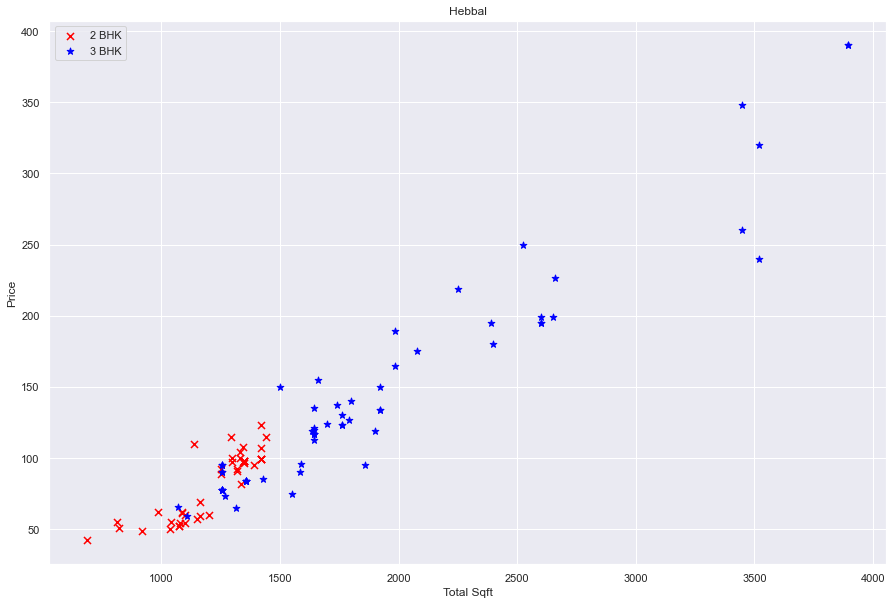

In [28]:
plot_scatter_chart(df3, 'Hebbal')

In [29]:
# Building a function that can remove the BHK outliers by using price_per_sqft

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df4 = remove_bhk_outliers(df3)

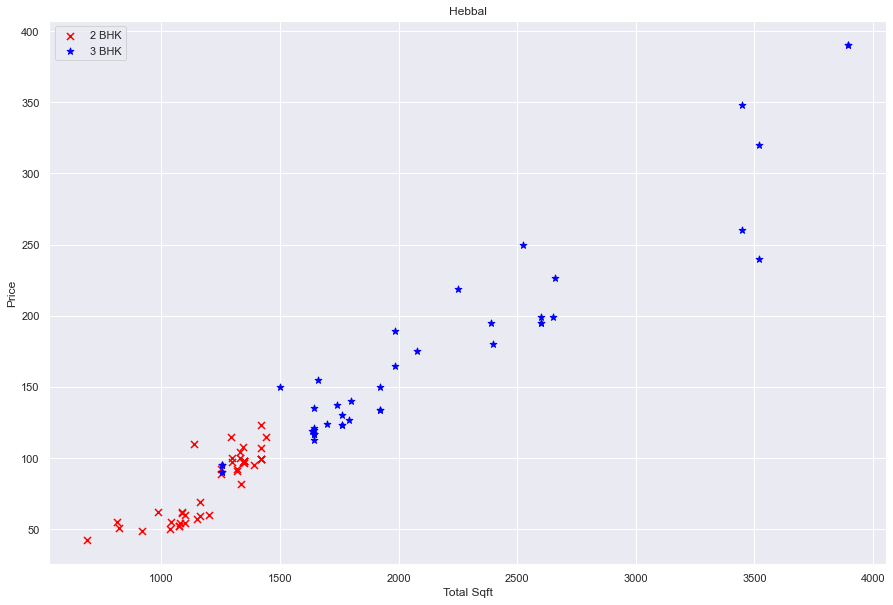

In [30]:
plot_scatter_chart(df4, 'Hebbal')

Text(0, 0.5, 'Count')

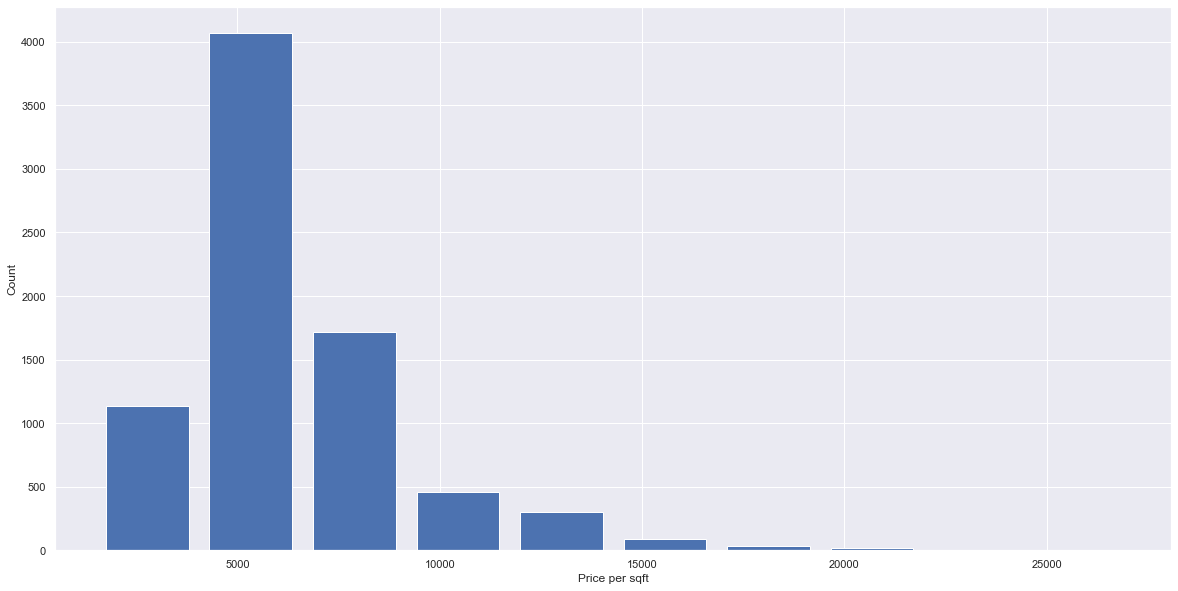

In [31]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df4.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [32]:
df4.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 27., 16.,
       13.])

Text(0, 0.5, 'Count')

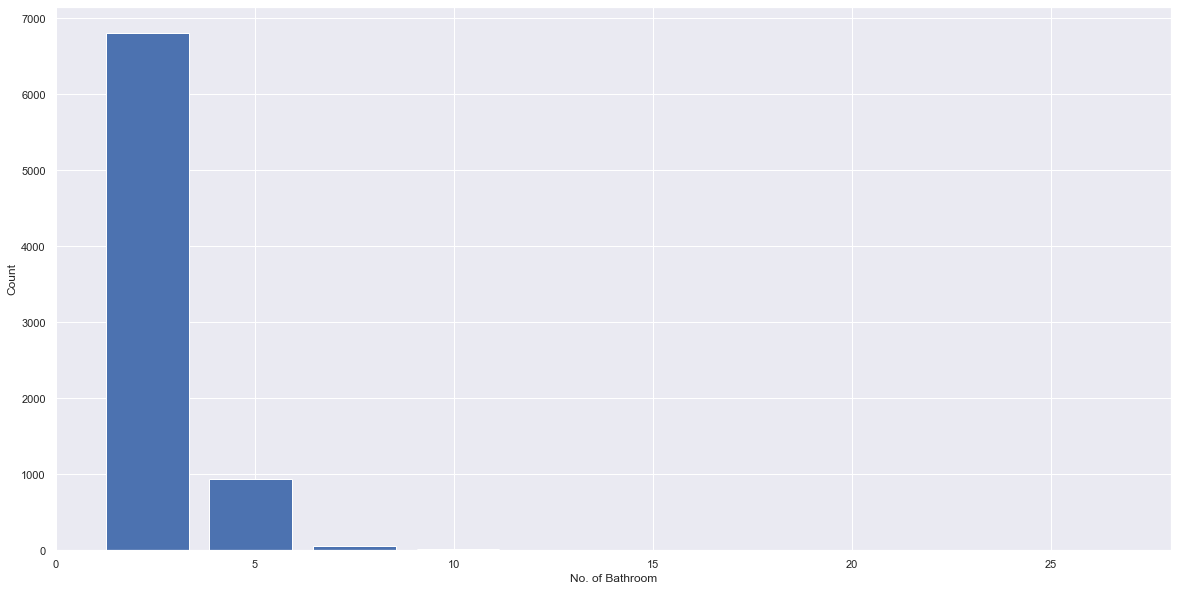

In [33]:
plt.hist(df4.bath, rwidth = 0.8)
plt.xlabel("No. of Bathroom")
plt.ylabel("Count")

In [34]:
df4 = df4[df4.bath < (df4.bhk + 2)]
df4.shape

(7738, 6)

In [35]:
df4 = df4.drop(['price_per_sqft'], axis = 'columns')
df4.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6
3,1st Block Jayanagar,1875.0,2.0,235.0,3
4,1st Block Jayanagar,930.0,4.0,85.0,7


In [36]:
dummies = pd.get_dummies(df4['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df5 = pd.concat((df4, dummies.drop('other', axis = 'columns')), axis = 'columns')
df5 = df5.drop(['location'], axis = 'columns')
df5.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df5.drop(['price'], axis = 'columns')
y = df5.price

In [39]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model(X, y):
    models = {
        'linear_reg': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso_reg': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2, 5, 10],
                'selection': ['cyclic', 'random']
            }
        },
        'Decision_reg': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for model_name, model in models.items():
        clf = GridSearchCV(model['model'], model['params'], cv = cv, return_train_score = False)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_
        })
    return pd.DataFrame(scores)

In [40]:
best_models = find_best_model(X, y)
best_models

,model,best_score,best_params
0,linear_reg,0.816781,{'fit_intercept': False}
1,lasso_reg,0.659890,"{'alpha': 1, 'selection': 'random'}"
2,Decision_reg,0.714149,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
lr_model = LinearRegression(fit_intercept = False)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.823664284703947

In [43]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.83672885, 0.79672413, 0.82608001, 0.79679415, 0.82506422])

In [44]:
def predict_price(location, sqft, bhk, bath):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_model.predict([x])[0]

In [45]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.30449646110308

# *Importing to pickel file*

In [46]:
import pickle

with open('banglore_real_estate_prediction.pickle', 'wb') as f:
    pickle.dump(lr_model, f)

In [47]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))